<div align="center">

<font size="5">

Laboratorium z przedmiotu: \
**Głębokie uczenie i analiza obrazów**

Ćwiczenie 2: \
**Budowa i optymalizacja sztucznej sieci neuronowej**

</font>

\
Marta Szarmach \
Zakład Telekomunikacji Morskiej \
Wydział Elektryczny \
Uniwersytet Morski w Gdyni

09.2023
</div>



# 1. Wprowadzenie

**Uczenie głębokie** jest podzbiorem algorytmów uczenia maszynowego, wykorzystującym złożone, wielowarstwowe modele - najczęściej **sieci neuronowe**, które z kolei są strukturami imitującymi ludzki układ nerwowy, złożonymi z jednostek mogących ulegać aktywacji - **sztucznych neuronów** - i połączeń między nimi, umiejącymi odnajdywać nawet skomplikowane, nieliniowe zależności w danych. Uczenie głębokie świetnie sprawdza się do analizy danych odzwierciedlających ludzkie zmysły: obrazów (sieci konwolucyjne), fragmentów mowy (sieci rekurencyjne). Sieci neuronowe wykorzystywane są do rozwiązywania znanych nam już rodzajów problemów (takich, jak regresja, klasyfikacja czy wykrywanie anomalii).  

Za pomocą pierwszej warstwy sieci, tzw. **warstwy wejściowej**, do sieci neuronowej wprowadzane są dane $x=a^{(1)}$ (warstwa ta zazwyczaj zbudowana jest z tylu neuronów, ile mamy cech w danych wejściowych). Dane te następnie ulegają przekształceniom w $l$ **warstwach ukrytych** (zazwyczaj realizujących przekształcenia liniowe $\Theta^{(l)} \cdot a^{(l)}$, a także nieliniowe z wykorzystaniem **funkcji aktywacji** $f(z)$, którym zawdzięczamy tak naprawdę ,,moc'' sieci neuronowych - bez tych funkcji wprowadzających nieliniowości, nasze modele byłyby zwykłymi przekształceniami liniowymi i nie umiałyby uczyć się złożonych funkcji!). Neurony umieszczone w ostatniej, **wyjściowej warstwie**, decydują o postaci ostatecznej predykcji $h_\theta(x)$ - zazwyczaj w zagadnieniach regresji na ostatniej warstwie umieszczany jest 1 neuron, który zwraca predykcję w postaci jakiejś liczby rzeczywistej, a w zagadnieniach klasyfikacji na ostatniej warstwie mamy tyle neuronów, ile klas, do których może należeć analizowana próbka danych (każdy neuron zwraca liczbę będącą prawdopodobieństwiem należenia tej próbki do danej klasy).

Ogólnie przepływ danych w ,,zwykłej'' sieci neuronowej można zapisać tak:
\begin{equation*}
    z^{(l)} = \Theta^{(l)} \cdot a^{(l-1)}
\end{equation*}

\begin{equation*}
    a^{(l)} = f(z^{(l)})
\end{equation*}

gdzie:
* macierz $\Theta^{(l)}$ określa wagi połączeń pomiędzy neuronami z $(l-1)$ a $l$-tej warstwy i to ona zawiera **parametry** wyuczone w ramach treningu sieci,
* funkcja aktywacji $f(z)$ może przybierać postać między innymi:
    * funkcji ReLU (ang. *Rectified Linear Unit*): $f(z) = \max(0,z)$,
    * znanej nam już funkcji sigmoid: $ f(z) = \frac{1}{1 + \exp(-z)} $,
    * funkcji Softmax, która zwraca znormalizowane (sumujące się do 1) prawdopodobieństwa należenia próbki do $i$-tej klasy: 
    $ f_i(z) = \frac{e^{z_i}}{\sum_{j=1}^{\textrm{num\_class}} e^{z_j}} $

Podczas treningu sieci neuronowych, podobnie jak w przypadku trenowania ,,klasycznych'' algorytmów uczenia maszynowego, zależy nam na doborze takich parametrów, które minimalizują funkcję kosztu $J(\Theta)$, tj. najlepiej oddają zależności pomiędzy danymi. Do optymalizacji funkcji kosztu możemy używać różnych algorytmów, takich jak znany nam już *Gradient Descent* czy Adam. Problemem jest jednak wyznaczanie gradientów (niezbędnych do optymalizacji w kierunku najszybszego spadku funkcji kosztu) w tak skomplikowanych, wielowarstwowych strukturach, jakimi są sieci neuronowe. W tym celu stosuje się algorytm **propagacji wstecznej**, który polega na przekazywaniu informacji o tym, jaki błąd w ostateczną predykcję ($\delta$) wprowadzają neurony na każdej warstwie w ,,dół'' sieci, od warstwy wyjściowej, przez ukryte, do wejściowej, uzwględniając na każdej warstwie ,,modyfikację'' tego błędu wprowadzaną przez tąż warstwę. Gradienty, z pomocą reguły łańcuchowej, liczone są na podstawie tychże błędów. Ogólne wzory przedstawiają się następująco:

\begin{equation*}
    \delta^{(l-1)} = \frac{\partial J(\Theta)}{\partial z^{(l-1)}} = (\Theta^{(l)})^T \cdot \delta^{(l)} * f'^{(l-1)} (z^{(l-1)})
\end{equation*}

\begin{equation*}
    \frac{\partial J(\Theta)}{\partial \Theta^{(l)}} = \delta^{(l)} \cdot (a^{l-1})^T
\end{equation*}


<div align="center">

<img src='https://raw.githubusercontent.com/Argenni/GUiAO_lab/main/rys/03_neural_network.png'/>

</div>

Podczas treningu musimy starać się zachować równowagę pomiędzy nadmiernym *bias*em (prostotą) a wariancją (złożonością) naszej sieci - przede wszystkim chcemy, żeby nasza sieć umiała dobrze generalizować, tj. wyciągać wnioski o danych i umieć radzić sobie także z danymi, których wcześniej nie widziała. Jeśli nasza sieć świetnie odzwierciedla dane treningowe, ale słabo radzi sobie na pozostałych zestawach, mamy do czynienia z tzw. **przeuczeniem** (ang. *overfitting*) naszej sieci. Aby temu zapobiec i poprawić osiągi naszej sieci na nowych danych, możemy (oprócz dostarczenia modeli większej ilości danych treningowych) zastosować szereg praktyk:
* **regularyzację**, tj. dodanie do funkcji kosztu składnika $||\theta||_2$ zależnego od wartości parametrów, który powoduje ,,karanie'' sieci za budowanie zbyt skomplikowanych hipotez,
* ***dropout***, czyli usuwanie losowo pewnych neuronów z sieci, zmniejszając w ten sposób jej skomplikowanie i zmuszając inne neurony do lepszej generalizacji,
* odpowiedni dobór hiperparametrów (tj. wartości, od których zależy działanie naszego modelu, ale nie są wyznaczane w trakcie treningu); w przypadku sieci neuronowych mogą to być:
    * ilość neuronów na każdej warstwie,
    * ilość warstw,
    * stała uczenia $\alpha$, określająca wpływ wyliczonych gradientów na aktualizację wag,
    * stała regularyzacji $\lambda$, określająca wpływ składnika $||\theta||_2$ na funkcję kosztu (im większa lambda, tym silniejszy efekt regularyzacji).

Pisanie wszystkich tych rzeczy, od przepływu danych, przez propagację wsteczną, aż do różnych innych warstw sieci neuronowych ,,od zera'' może być problematyczne - całe szczęście, że mamy biblioteki, które robią to za nas! Nie dość, że mają one gotowe ,,bloczki'' do budowy sieci neuronowych, to jeszcze same śledzą, w jaki sposób dane przepływają w naszych sieciach i przeprowadzają propagarcję wsteczną. Przykładami są PyTorch, ktorego to będziemy dziś używać, TensorFlow czy Keras.



# 2. Cel ćwiczenia

**Celem niniejszego ćwiczenia** jest zapoznanie się z budową sztucznych sieci neuronowych poprzez:
* implementacji architektury sztucznej sieci neuronowej o niewielkiej ilości warstw z wykorzystaniem biblioteki PyTorch i języka programowania Python,
* obserwacji, jakie elementy tej architektury można modyfikować (hiperparametry), a które elementy uczone są w wyniku treningu modelu (parametry).


# 3. Stanowisko laboratoryjne

Do wykonania niniejszego ćwiczenia niezbędne jest stanowisko laboratoryjne, składające się z komputera klasy PC z zainstalowanym oprogramowaniem:
* językiem programowania Python (w wersji 3.8),
* IDE obsługującym pliki Jupyter Notebook (np. Visual Studio Code z rozszerzeniem ipykernel).


# 4. Przebieg ćwiczenia
## 4.1. Implementacja 3-warstwowej sieci neuronowej z wykorzystaniem biblioteki PyTorch

Na początku wykonaj poniższy fragment kodu, aby zaimportować biblioteki niezbędne do wykonania poniższego ćwiczenia:
* **PyTorch** - biblioteka wspomagająca budowanie architektur sieci neuronowych, posiadająca wbudowane moduły odpowiadające różnym warstwom sieci neuronowych, automatyczne obliczanie gradientów (*autograd*) niezbędne do przeprowadzenia treningu sieci neuronowych,
* **NumPy** - biblioteka umożliwiająca wykonywanie wysoko zoptymalizowanych obliczeń matematycznych na objektach typu *numpy array* (wielowymiarowych tablic),
* **Matplotlib** - biblioteka wspomagająca wizualizację pracy czy analizę danych poprzez wyświetlanie wykresów,
* **Scikit-learn** - biblioteka zawierająca gotowe implementacje wielu algorytmów klasycznego uczenia maszynowego, a także zbiory danych czy metryki. Tutaj skorzystamy ze zbioru danych iris - `datasets.load_iris`, metody `model_selection.train_test_split` służącej do podziału danych na zestaw treningowy i testowy oraz klasy `preprocessing.StandardScaler`, za pomocą której standaryzacji naszych danych.

In [1]:
! python -m pip install torch==2.0.1
! python -m pip install numpy==1.22.3
! python -m pip install scikit-learn==0.24.2
! python -m pip install matplotlib==3.4.2

import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# (dla zachowania powtarzalności wyników)
np.random.seed(10) 
torch.manual_seed(10)

     ---------------------------------------- 0.0/172.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/172.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/172.4 MB ? eta -:--:--
     -------------------------------------- 0.0/172.4 MB 330.3 kB/s eta 0:08:42
     -------------------------------------- 0.1/172.4 MB 585.1 kB/s eta 0:04:55
     ---------------------------------------- 0.3/172.4 MB 1.2 MB/s eta 0:02:23
     ---------------------------------------- 0.4/172.4 MB 1.6 MB/s eta 0:01:45
     ---------------------------------------- 0.5/172.4 MB 1.5 MB/s eta 0:01:57
     ---------------------------------------- 0.8/172.4 MB 2.3 MB/s eta 0:01:17
     ---------------------------------------- 1.1/172.4 MB 2.7 MB/s eta 0:01:03
     ---------------------------------------- 1.3/172.4 MB 2.8 MB/s eta 0:01:01
     ---------------------------------------- 1.5/172.4 MB 3.1 MB/s eta 0:00:56
     ---------------------------------------- 1.7/172.4 MB 3.

### Wczytanie i przygotowanie danych

Na początku przygotujmy dane, na których będziemy dziś pracować. Tym razem korzystać będziemy z całego zbioru iris (nie będziemy się ograniczać jedynie do 2 klas). Uruchom kod z poniższej komórki, aby:
* wczytać oryginalne dane z zestawu iris do zmiennej $X$ i ich etykiety do zmiennej $y$,
* obliczyć (z wykorzystaniem metody `numpy.unique`, wyszukującej unikatowe wartości z tablicy, której opis znajdziesz [TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)) w automatyczny sposób ilość klas występujących w naszym zbiorze danych (tj. ilość unikalnych wartości w etykietach) - wiemy, że powinno ich być 3,
* z pomocą `train_test_split` wydzielić 60% danych (90 próbek) jako zestaw treningowy $Xtrain$, a pozostałą część danych po równo podzielić na zestaw walidacyjny $Xval$ i testowy $Xtest$ (po 20%, czyli 30 próbek),
* z pomocą klasy `StandardScaler` i metody `fit_transform` dokonać standaryzacji każdego zbioru danych,
* przygotować etykiety tak, aby współpracowały z funkcją kosztu `CrossEntropyLoss`, którą zastosujemy przy treningu naszej sieci - odpowiedź od każdego neuronu zbierana będzie w osobnej kolumnie tablicy, dlatego nasze etykiety w formacie (*num_samples*,), zawierające wartości 0,1,2 przekształcimy za pomocą one-hot-encodingu do postaci (*num_samples*, *num_classes*), np. 2 -> [0,0,1]
* ostatecznie, zestandaryzowane dane i przekształcone etykiety, które będą przekazywane sieci neuronowej, przekształcimy do formatu    `torch.tensor`, aby były zrozumiałe dla PyTorcha.

In [2]:
# --------------------------- Inicjalizacja ----------------------------
# Wczytanie danych
iris = load_iris()
X = iris.data
y = iris.target
num_classes = (np.unique(y)).shape[0]

# Podziel dane na zestaw treningowy (60%), walidacyjny (20%) i testowy (20%) z wykorzystaniem metody train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.6)
Xval, Xtest, yval, ytest = train_test_split(Xtest,ytest,train_size=0.5)

# Dokonaj standaryzacji danych z wykorzystaniem klasy StandardScaler
scaler = StandardScaler()
Xtrain_norm = scaler.fit_transform(Xtrain)
Xval_norm = scaler.fit_transform(Xval)
Xtest_norm = scaler.fit_transform(Xtest)

# Dokonaj one-hot-encodingu etykiet z zestawu treningowego i walidacyjnego
ytrain_ohe = np.identity(num_classes)[ytrain]
yval_ohe = np.identity(num_classes)[yval]

# Przekonwertuj dane wejściowe na tensory, by mogłby być obsługiwane przez PyTorch
Xtrain_norm = torch.tensor(Xtrain_norm)
ytrain_ohe = torch.tensor(ytrain_ohe) 
Xval_norm = torch.tensor(Xval_norm) 
yval_ohe = torch.tensor(yval_ohe)
Xtest_norm = torch.tensor(Xtest_norm)

### Określenie struktury naszej sieci neuronowej

W kolejnym kroku zdefiniujemy strukturę naszej sieci neuronowej, korzystając z klas dostępnych w bibliotece PyTorch! Zrobimy to w naszej własnej klasie - nazwijmy ją `NeuralNet` - która musi dziedziczyć z klasy `torch.nn.Module`. Ogólny przewodnik po tworzeniu klasy opisującej strukturę sieci neuronowej w PyTorchu dostępny jest [TUTAJ](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html) - zwróć uwagę, że klasa musi koniecznie zawierać minimum dwie metody:
* metodę-konstruktor `__init__()` - w której umieszczamy w **obiektach** przekształcenia reprezentujące warstwy tworzące naszą sieć, takie jak:
    * `torch.nn.Linear` - opisujące liniowe przekształcenie pomiędzy sąsiednimi warstwami (to tu modelowane jest $\Theta$, dlatego musimy zdefiniować ilość neuronów na warstwie ,,wcześniejszej'' (`in_features`) i ,,późniejszej'' (`out_features`)) [TUTAJ](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).
    * `torch.nn.ReLU` - realizujące funkcję aktywacji ReLU [TUTAJ](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html),
    * `torch.nn.Dropout` - realizujące *dropout* (musimy podać prawdopodobieństwo wykluczenia neuronu) [TUTAJ](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html),
    * `torch.nn.Softmax` - realizujące funkcję aktywacji softmax [TUTAJ](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) (Softmax chce, aby w argumencie `dim` jawnie określić, według któr sumowanie ma dać łącznie wartość 1 - w naszym przypadku, chcemy sumować po odpowiedziach neuronów (`dim=1`), a nie próbkach w batchu (`dim=0`)),
    * `torch.nn.Sequential` - stanowiące ,,kontener'', w którym możemy łączyć różne z powyższych bloków ze sobą [TUTAJ](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).
    
    Do tej metody przekazujemy argumenty niezbędne podczas tworzenia obiektu będącego naszą siecią neuronową (np. ilość neuronów na poszczególnych warstwach).
* metodę `forward()` - w której określamy przepływ danych pomiędzy warstwami określonymi w `__init__` (jakie dane wchodzą, jak są przetwarzane i co zwraca nasza sieć) - kolejne warstwy są tutaj ,,wywoływane''. Do tej metody przekazujemy argumenty niezbędne do wykonania *forward pass*, np. dane wejściowe.

Uzupełnij zatem poniższy kod! Niech nasza sieć neuronowa składa się z następujących warstw: 
`Linear` -> `Dropout` -> `ReLU` -> `Linear` -> `Softmax`.
Na pierwszej warstwie (wejściowej) ma być tyle neuronów, ile cech w danych wejściowych (tutaj: 4), na drugiej (ukrytej), na drugiej pewną ilość (założyłam tutaj 8), a na ostatniej - tyle, ile klas (czyli 3). Prawdopodobieństwo odrzucenia neuronu niech wynosi 0,25.

In [3]:
class NeuralNet(torch.nn.Module):
    """
    Model sztucznej sieci neuronowej zbudowanej z 3 warstw 
    (Linear + Dropout + Relu) -> (Linear + Softmax)
    """
    
    def __init__(self, input_layer_size, output_layer_size, hidden_layer_size = 8):
        super().__init__()
        # ------- UZUPEŁNIJ KOD -----------------------------------------------
        # Zdefiniuj budowę swojej sieci
        # 1. Połączenie warstwy wejściowej z ukrytą
        self.input_to_hidden = torch.nn.Sequential(
            # a) Warstwa liniowa (uważnie zdefiniuj rozmiary macierzy wag!)
            torch.nn.Linear(in_features=input_layer_size, out_features=hidden_layer_size),
            
            # b) Dropout (niech neuron zostanie usunięty z prawdopodobieństwem 0.25)
            torch.nn.Dropout(0.25),
            
            # c) Funkcja aktywacji ReLU
            torch.nn.ReLU()
        )
        # 2. Połączenie warstwy ukrytej z wyjściową:
        self.hidden_to_output = torch.nn.Sequential(
            # a) Warstwa liniowa
            torch.nn.Linear(in_features=hidden_layer_size, out_features=output_layer_size),
            
            # b) Funkcja aktywacji Softmax (pamiętaj o zdefiniowaniu argumentu dim)
            torch.nn.Softmax(dim=1) 
        )
        # --------------------------------------------------------------------
        
    def forward(self, X):
        # Zdefiniuj przepływ danych w swojej sieci:
        # 1. Niech dane wejściowe X przekazane zostaną do warstwy ukrytej (input_to_hidden)
        X = self.input_to_hidden(X)
        # ------- UZUPEŁNIJ KOD ---------------------
        # 2. Niech dane z warstwy ukrytej przekazane zostaną do warstwy wyjściowej (hidden_to_output)
        X = self.hidden_to_output(X)
        # -------------------------------------------
        return X

Spróbujmy utworzyć obiekt tejże klasy i wykonać jakiś próbny *forward pass*, aby przekonać się, czy budowa naszej sieci jest poprawna (przynajmniej pod kątem składnowym i numerycznym, tj. czy zgadzają się wymiary tensorów przekazywanych pomiędzy warstwami). Uruchom więc kod z poniższej komórki. 

Pamiętajmy, że na ostatniej warstwie naszej sieci znajdują się 3 neurony - tyle, ile klas, do których mogą należeć analizowane przez nią dane. Wynika z tego, że na wyjściu sieci neuronowej otrzymamy 3 różne wartości. Jako że zastosowaliśmy na warstwie wyjściowej funkcję aktywacji Softmax, każdą z tych 3 wartości powinniśmy utożsamiać z prawdopodobieństwem, że badana próbka danych należy do klasy związanej z danym neuronem. Jako że sieć jeszcze nie została niczego nauczona, nie jest pewna, do której klasy powinny należeć badane próbki danych, a więc aktywacje neuronów (prawdopodobieństwa) powinny mieć wartości zbliżone do 0,33. 

In [4]:
nn = NeuralNet(input_layer_size=X.shape[1],output_layer_size=num_classes)
nn = nn.double()
pred = nn(Xval_norm)
print("Przykładowe predykcje modelu na danych walidacyjnych: "+str(pred[0:5]))

Przykładowe predykcje modelu na danych walidacyjnych: tensor([[0.3170, 0.3236, 0.3595],
        [0.3399, 0.2872, 0.3728],
        [0.3936, 0.2858, 0.3206],
        [0.3387, 0.3549, 0.3064],
        [0.4847, 0.2300, 0.2854]], dtype=torch.float64,
       grad_fn=<SliceBackward0>)


### Trening sieci neuronowej

Po zbudowaniu naszej sieci neuronowej, czas ją czegoś nauczyć! Zgodnie z oficjalnymi poradnikami ([TUTAJ](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) i [TUTAJ](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)), ogólnie rzecz biorąc, aby wytrenować sieć neuronową w PyTorchu, należy wykonać kilka następujących po sobie kroków.
* Utwórz obiekt klasy zdefiniowanej chwilę temu - zawierającej budowę naszej sieci neuronowej. Metoda `parameters()` tego obiektu stanowi odniesienie do parametrów modelu, które będą optymalizowane w trakcie treningu. 
* Z gotowych PyTorchowych klas, wybierz funkcję kosztu oraz algorytm optymalizacji, które posłużą nam podczas treningu - skorzystaj np. z  `Cross Entropy Loss` ([TUTAJ](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) oraz optymalizatora `Adam` ([TUTAJ](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)), zapisując je jako osobne obiekty. Adam potrzebuje min. następujących argumentów:
    * odniesienia do parametrów, które ma optymalizować (patrz wyżej!) (argument `params`),
    * stałej uczenia $\alpha$ (argument `lr`),
    * stałej regularyzacji $\lambda$ (argument `weight_decay` - przekażmy jej zawartość zmiennej o nazwie `lambdA`, o której więcej powiemy za chwilę).
* Przełącz sieć na tryb treningu (jest to istotne z punktu widzenia niektórych technik, takich tak Dropout czy BatchNorm - tak, by sieć wiedziała, w jaki sposób wykonać pewne operacje) - wywołaj z modelu metodę `train()`.
*  Powtarzaj iteracyjnie:
    * wykonaj *forward pass* na danych treningowych - tj. ,,wywołaj'' utworzony wcześniej obiekt, jako argument podając zmienną przechowującą dane treningowe,
    * oblicz wartość kosztu przy obecnej iteracji, wywołując obiekt związany z funkcją kosztu, jako argumenty podając dwa porównywane wektory (odpowiedzi sieci z *forward pass* oraz docelowe odpowiedzi treningowe),
    * wymuś na PyTorchu wykonanie propagacji wstecznej - niech zadzieje się magia! wystarczy, że na obiekcie, którego wartości mają być propagowane (czyli obliczonym chwilę wcześniej koszcie), wywołasz metodę `backward()`,
    * mając obliczone w wyniku propagacji wstecznej gradienty, wymuś na PyTorchu aktualizację parametrów - wystarczy, że wykonasz na obiekcie związanym z algorytmem optymalizacji metodę `step()`,
    * usuń obliczone gradienty, tak, by nie miały wpływu na kolejne iteracje (metodą `zero_grad()` na obiekcie z algorytmem optymalizacji),
    * miło by było zapisać wartość kosztu do pewnej zmiennej, aby móc potem wyświetlić, jak koszt się zmieniał w trakcie treningu i czy nie doszło do przeuczenia - z tego samego powodu, warto jest całość powtórzyć też (bez liczenia gradientów i aktualizacji wag!) na zestawie walidacyjnym (w trybie ewaluacji).
    <font size="2">Metoda `detach()` powoduje ,,oderwanie'' tensora od silnika PyTorcha - po to, by nie były niepotrzebnie liczone dla niego gradienty, które zabierałyby tylko pamięć i moc obliczeniową.</font>

Uzupełnij zatem fragmety funkcji `train_nn()` z poniższej komórki, aby to wszystko wdrożyć! 

In [5]:
def train_nn(Xtrain, ytrain, Xval, yval, num_classes, lambdA, if_plot=True):
    """
    Wykonaj trening swojej sieci neuronowej zdefiniowanej w klasie NeuralNet 
    na zadanych danych wejściowych i z określoną stałą regularyzacji lambdA. \n
    Argumenty: \n
    - Xtrain - dane treningowe (torch tensor, shape = (num_samples * percentage_train, num_features) ), \n
    - ytrain - etykiety do danych treningowych po one-hot-encodingu
        (torch tensor, shape = (num_samples * percentage_train, num_classes) ), \n
    - Xval - dane testowe (torch tensor, shape = (num_samples * percentage_val, num_features) ), \n
    - yval - etykiety do danych walidacyjnych po one-hot-encodingu
        (torch tensor, shape = (num_samples * percentage_val, num_classes) ), \n
    - num_classes - ilość klas, tj. ile różnych wartości pojawia się w etykietach (int, skalar), \n
    - lambdA - stała regularyzacji (int, skalar), \n
    - if_plot - Boolean, decyduje, czy po treningu wyświetlić krzywe uczenia. \n
    Zwraca: nn - wytrenowana sieć neuronowa, zdefiniowana w klasie NeuralNet.
    """
    nn = NeuralNet( # Tworzymy obiekt naszej klasy NeuralNet,
        input_layer_size=Xtrain.shape[1], # gdzie na warstwie wejściowej ma być tyle neuronów, ile cech X,
        output_layer_size=num_classes) #  a na warstwie wyjściowej tyle neuronów, ile potencjalnych klas.
    nn = nn.double() # (dla ujednolicenia formatów zmiennych)
    loss_train_vec = [] # (zmienne, do których zapisywać będziemy wartości kosztu (dla danych treningowych
    loss_val_vec = []   # i walidacyjnych) w kolejnych iteracjach treningu)

    # --------------- UZUPEŁNIJ KOD ------------------------------
    # Zdefiniuj funkcję kosztu i algorytm optymalizacji
    # 1. Niech funkcją kosztu będzie Cross Entropy Loss - zapiszmy ją w obiekcie o nazwie criterion
    criterion = torch.nn.CrossEntropyLoss()
    # 2. Jako algorytm optymalizacji wybierz Adam ze stałą uczenia lr=0.001 i stałą regularyzacji równą lambdA
    #    (zapisz to jako obiekt o nazwie optimizer)
    optimizer = torch.optim.Adam(params=nn.parameters(), lr=0.001, weight_decay=lambdA)
    # ------------------------------------------------------------
    
    # Wykonaj 1000 iteracji algorytmu optymalizacji, a przy każdej:
    for i in range(1000): 
        # 1. Oblicz koszt na danych walidacyjnych (aby sprawdzić bias-variance trade-off)
        # a) Przełącz model na tryb ewaluacji (tak, by techniki takie jak Dropout czy BatchNorm działały jak trzeba)
        if if_plot:
            nn.eval()
            with torch.no_grad(): # Wyłącz obliczanie gradientów (są potrzebne tylko przy backpropie, tu zapychałyby pamięć)
                # b) Forward pass - dokonaj predykcji na danych walidacyjnych
                pred = nn(Xval) 
                # c) Oblicz za pomocą criterion wartość kosztu dla dokonanych predykcji walidacyjnych
                loss_val = criterion(pred, yval) 
                # d) Zapisz wartość kosztu w odpowiedniej zmiennej
                loss_val_vec.append(loss_val.detach().numpy())
             
        # 2. Oblicz koszt na danych treningowych - powtórz podobne kroki, co powyżej:
        # --------------- UZUPEŁNIJ KOD -----------------------------------------------------
        #  a) Przełącz model na tryb treningu
        nn.train()
        
        # b) Forward pass - dokonaj predykcji na danych treningowych
        pred = nn(Xtrain)
        
        # c) Oblicz za pomocą criterion wartość kosztu dla dokonanych predykcji treningowych
        loss_train = criterion(pred, ytrain)
        
        # d) Uruchom na obliczonym koszcie metodę backward(), wykonującą propagację wsteczną błędów (i obliczanie gradientów)
        loss_train.backward() 
        
        # e) Wykonaj jedną iterację algorytmu optymalizacji (metoda step() na obiekcie związanym z algorytmem)
        optimizer.step()
        
        # f) Wyczyść obliczone gradienty, by nie miały wpływu na następne iteracje algorytmu optymalizacji
        optimizer.zero_grad()
        
        # g) Zapisz wartość kosztu w odpowiedniej zmiennej (loss_train_vec)
        loss_train_vec.append(loss_train.detach().numpy())
        # -----------------------------------------------------------------------------------

    # Wyświetl krzywe uczenia - zmiany kosztu przy każdej iteracji
    if if_plot:
        print("  Zakończono trening sieci.")
        fig, ax = plt.subplots()
        ax.plot(loss_train_vec, color='k')
        ax.plot(loss_val_vec, color='r')
        ax.set_title("Krzywe uczenia")
        ax.set_xlabel("Iteracja")
        ax.set_ylabel("Koszt")
        ax.legend(["Koszt na danych treningowych", "Koszt na danych walidacyjnych"])
    return nn

Sprawdźmy zatem, jak zmieniły się predykcje dokonane przez naszą sieć, kiedy czegoś ją nauczyliśmy (jeszcze bez żadnej regularyzacji): powinniśmy widzieć większe zróżnicowanie wyników.

In [6]:
nn = train_nn(
    Xtrain=Xtrain_norm, 
    ytrain=ytrain_ohe, 
    Xval=Xval_norm, 
    yval=yval_ohe, 
    num_classes=num_classes,
    lambdA=0,
    if_plot=False)
pred = nn(Xval_norm)
print("Przykładowe predykcje modelu na danych walidacyjnych (po treningu): "+str(pred[0:5]))

Przykładowe predykcje modelu na danych walidacyjnych (po treningu): tensor([[3.3760e-04, 8.7072e-02, 9.1259e-01],
        [9.9769e-03, 2.2523e-01, 7.6479e-01],
        [1.1277e-02, 8.0375e-01, 1.8497e-01],
        [8.4473e-03, 2.0690e-01, 7.8465e-01],
        [5.4513e-04, 4.6837e-01, 5.3108e-01]], dtype=torch.float64,
       grad_fn=<SliceBackward0>)


### Predykcja

Struktura sieci to jedno, jej trening to drugie, ale ważną rzeczą jest też uporządkowanie sposobu, w jaki rozumiemy predykcje naszej sieci. Przypomnijmy, że każdą z 3 wartości zwracaną przez naszą sieć dla danej próbki powinniśmy utożsamiać z prawdopodobieństwem, że badana próbka danych należy do klasy związanej z danym neuronem. Próbka powinna ostatecznie zostać zaklasyfikowana do tej grupy, której przypisano najwyższe prawdopodobieństwo. Musimy zatem użyć funkcji (proponuję `torch.argmax()`, opisaną [TUTAJ](https://pytorch.org/docs/stable/generated/torch.argmax.html)), która zwraca indeks tej spośród wyjściowych wartości (aktywacji neuronów), która jest największa - w ten sposób otrzymamy numer klasy, do której powinna należeć nasza badana próbka. <font size="2">Jest to niejako operacja odwrotna do one-hot-encodingu.</font>

Uzupełnij zatem kod funkcji `pred_nn()`, która zawiera implementację powyższych działań.

In [7]:
def pred_nn(X, nn):
    """
    Dokonuje ostatecznej predykcji sieci neuronowej (obiektu NeuralNet) - wskazania klasy - dla danych wejściowych X. \n
    Argumenty: \n
    - X - dane wejściowe (torch tensor, shape = (num_samples, num_features) ), \n
    - nn - model sieci neuronowej, obiekt naszej klasy NeuralNet
    Zwraca: pred - numer klasy wg klasyfikatora właściwy dla X (numpy array, shape = (num_samples,) ).
    """
    # --------- UZUPEŁNIJ KOD -------------
    pred = torch.argmax(nn(X), dim=1)
    # -------------------------------------
    return pred.detach().numpy()

Zobaczmy, jak wyglądają nasze predykcje dla danych walidacyjnych, kiedy jednoznacznie wskazujemy, do której klasy przypisać daną próbkę (a nie operujemy na prawdopodobieństwach):

In [8]:
pred = pred_nn(Xval_norm, nn)
print("Przykładowe predykcje dla danych walidacyjnych: "+str(pred[0:5]))

Przykładowe predykcje dla danych walidacyjnych: [2 2 2 2 2]


### Dobór hiperparametrów

W ostatnim kroku postarajmy się znaleźć taką wartość stałej regularyzacji $\lambda$, przy której nasz model działa najlepiej - to znaczy, osiąga najwyższą dokładność na danych, których wcześniej nie widział (walidacyjnych). $\lambda$ odpowiada za to, jak bardzo model ,,karany'' jest za budowanie skomplikowanych hipotez. Będziemy szukać odpowiedniej wartości $\lambda$ wśród następujących: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5 oraz 1.

Napiszmy funkcję `choose_lambda`, której główna część powinna składać się z następujących kroków:
* Sprawdzenie działania modelu dla każdej z badanych wawrtości $\lambda$:
    * Dokonaj treningu (na danych treningowych) sieci z zadaną wartością $\lambda$.
    * Dokonaj klasyfikacji tych danych i oblicz jej skuteczność (dokładność).
    Wskazówka: Aby zmierzyć skuteczność, musimy mieć możliwość łatwego porówania predykcji i etykiet *ground truth*, a zwróć uwagę, że tutaj przekazujemy do funkcji jako argument rtykiety już przekształcone przez one-hot-encoding, aby mogły posłużyć do treningu sieci. W celu odwrócenia one-hot-encodingu, zastosuj przykładowo funkcję `np.where` ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.where.html)). 
    * Dokonaj klasyfikacji danych walidacyjnych i oblicz jej dokładność.
* Wyświetl, jak zmieniała się dokładność klasyfikacji na obu zestawach danych w zależności od użytej wartości $\lambda$.
* Wybierz tę wartość $\lambda$, przy której model osiągnął najwyższą dokładność na danych z zestawu walidacyjnego - tutaj znów przyjdzie nam z pomocą funkcja `np.argmax`, tym razem z biblioteki NumPy ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)).

In [9]:
def choose_lambda(Xtrain, ytrain, Xval, yval, num_classes):
    """
    Znajdź wartość optymalnej stałej regularyzacji lambda dla sieci neuronowej klasy NeuralNet. \n
    Argumenty: \n
    - Xtrain - dane treningowe (torch tensor, shape = (num_samples * percentage_train, num_features) ), \n
    - ytrain - etykiety do danych treningowych po one-hot-encodingu
        (torch tensor, shape = (num_samples * percentage_train, num_classes) ), \n
    - Xval - dane walidacyjne (torch tensor, shape = (num_samples * percentage_val, num_features) ), \n
    - yval - etykiety do danych walidacyjnych po one-hot-encodingu
        (torch tensor, shape = (num_samples * percentage_val, num_classes) ), \n
    - num_classes - ilość klas, tj. ile różnych wartości pojawia się w etykietach (int, skalar). \n
    Zwraca: optimal_lambda - optymalna wartość stałej regularyzacji dla Twojej sieci (float, skalar).
    """
    lambdas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
    accuracies_train = []
    accuracies_val = []
    # ------- UZUPEŁNIJ KOD ------------------------------------------------------------------
    for lambdA in lambdas:
        # 1. Wykonaj trening sieci neuronowej z wartością lambda z tej iteracji 
        # (z wykorzystaniem train_nn, tak, by nie wyświetlały się stałe uczenia)
        nn = train_nn(Xtrain, ytrain, Xval, yval, num_classes, lambdA=lambdA, if_plot=False)
        
        # 2. Forward pass - oblicz predykcje sieci dla danych treningowych (z wykorzystaniem pred_nn)
        pred_train = pred_nn(Xtrain, nn)
        
        # 3. Odwróć one-hot-endocing etykiet treningowych (do obliczenia dokładności)
        ytrain_original = np.where(ytrain==1)[1] 
        
        # 4. Oblicz dokładność sieci na danych treningowych (tj. średnia ilość decyzji dobrze podjętych przez sieć)
        accuracy_train = np.mean(pred_train==ytrain_original)
        
        # 5. Dodaj obliczoną chwilę temu wartość dokładności do listy accuracies_train (metodą .append() )
        accuracies_train.append(accuracy_train)
        
        # Powtórz kroki 1-5 dla danych walidacyjnych
        pred_val = pred_nn(Xval, nn)
        yval_original = np.where(yval==1)[1]
        accuracy_val = np.mean(pred_val==yval_original)
        accuracies_val.append(accuracy_val)
        
    # Wybierz optymalną wartość lambda - tę, przy której mamy najwyższą dokładność 
    # na zestawie walidacyjnym (podpowiedź: wykorzystaj metodę np.argmax)
    optimal_lambda = lambdas[np.argmax(accuracies_val)]
    # -----------------------------------------------------------------------------------------
    
    print("Optymalna wartość lambda: " + str(optimal_lambda))
    # Wyświetl zależność dokładności od lambda dla obu zestawów
    fig, ax = plt.subplots()
    ax.plot(lambdas, accuracies_train, color='k')
    ax.plot(lambdas, accuracies_val, color='r')
    ax.set_title("Wpływ lambda na działanie sieci")
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Dokładność")
    ax.legend(["Dokładność na danych treningowych", "Dokładność na danych walidacyjnych"])
    return optimal_lambda

Czas uruchomić całość, łącznie z poszukiwaniem optymalnej wartości $\lambda$! 

Optymalna wartość lambda: 0.005
  Zakończono trening sieci.
Dokładność modelu na danych treningowych: 93.33333333333333%
Dokładność modelu na danych walidacyjnych: 70.0%
Dokładność modelu na danych testowych: 83.33333333333334%


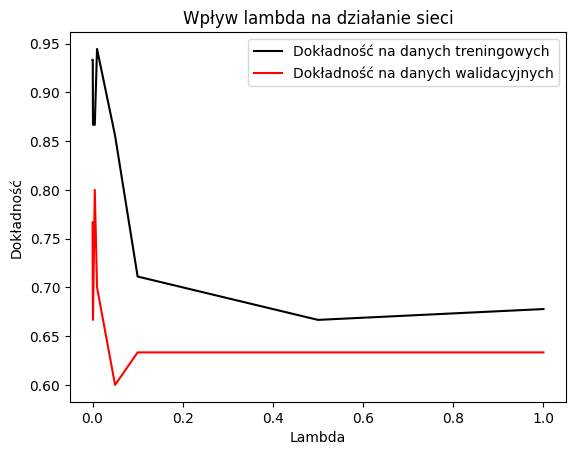

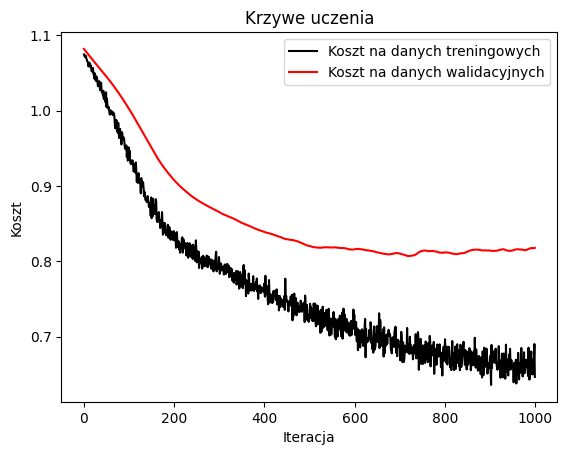

In [10]:
# -------------------- Trening sieci neuronowej -------------------------
# Dobierz wartość hiperparametru lambda (do regularyzacji)
optimal_lambda = choose_lambda(
    Xtrain=Xtrain_norm, 
    ytrain=ytrain_ohe, 
    Xval=Xval_norm, 
    yval=yval_ohe, 
    num_classes=num_classes)
# Dokonaj ostatecznego treningu sieci neuronowej
nn = train_nn(
    Xtrain=Xtrain_norm, 
    ytrain=ytrain_ohe, 
    Xval=Xval_norm, 
    yval=yval_ohe, 
    num_classes=num_classes,
    lambdA=optimal_lambda)

# ----------------- Predykcja i sprawdzenie działania -------------------
pred = pred_nn(Xtrain_norm, nn)
accuracy = np.mean(pred==ytrain)
print("Dokładność modelu na danych treningowych: "+str(accuracy*100)+'%')
pred = pred_nn(Xval_norm, nn)
accuracy = np.mean(pred==yval)
print("Dokładność modelu na danych walidacyjnych: "+str(accuracy*100)+'%')
pred = pred_nn(Xtest_norm, nn)
accuracy = np.mean(pred==ytest)
print("Dokładność modelu na danych testowych: "+str(accuracy*100)+'%')

Jeśli na wykresie krzywych uczenia nie obserwujesz znaczącego *overfittingu* (krzywa dla zestawu walidacyjnego nie rośnie przy dalszym spadku krzywej dla zestawu treningowego) - świetnie! Udało Ci się wytrenować sieć neuronową.

## 4.2 Dowolny tuning sieci

Czas na Twoją inwencję! W naszej sieci mamy jeszcze kilka innych hiperparametrów oprócz $\lambda$. Spróbuj pozmieniać wartości:
* prawdopodobieństwa ,,wypadnięcia'' neuronu na warstwie *Dropout*,
* ilości iteracji algorytmu optymalizacji,
* ilości neuronów na warstwie ukrytej,
* a może nawet ilości warstw (może samodzielnie dodasz kolejną?).

Dokonaj modyfikacji w kodzie, po czym ponownie uruchom poszczególne komórki, by sprawdzić, jak zmieniła się skuteczność działania Twojej sieci neuronowej.


## 4.3 Implementacja prostej sieci neuronowej ,,od zera''

Przekonaliśmy się, że PyTorch (oraz inne podobne biblioteki) umożliwia nam zbudowanie sieci neuronowej, korzystając z predefiniowanych, gotowych ,,bloczków''. Żeby jednak dokładniej zrozumieć ideę przekazywania danych pomiędzy warstwami oraz sposób działania propagacji wstecznej, warto zbudować sieć samemu.

Wykorzystamy te same dane, które pobraliśmy w celu wykonania wcześniejszych podpunktów - tutaj jedynie nie będziemy musieli przekształcać ich na tensory, gdyż operować będziemy z wykorzystaniem jedynie biblioteki NumPy.

In [11]:
# --------------------------- Inicjalizacja ----------------------------
# Wczytanie danych
iris = load_iris()
X = iris.data
y = iris.target
num_classes = (np.unique(y)).shape[0]
# Podziel dane na zestaw treningowy (70%), walidacyjny (15%) i testowy (15%) z wykorzystaniem metody train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.7)
Xval, Xtest, yval, ytest = train_test_split(Xtest,ytest,train_size=0.5)
# Dokonaj standaryzacji danych z wykorzystaniem klasy StandardScaler
scaler = StandardScaler()
Xtrain_norm = scaler.fit_transform(Xtrain)
Xval_norm = scaler.fit_transform(Xval)
Xtest_norm = scaler.fit_transform(Xtest)
# Dokonaj one-hot-encodingu etykiet z zestawu treningowego i walidacyjnego
ytrain_ohe = np.identity(num_classes)[ytrain]
yval_ohe = np.identity(num_classes)[yval]

Przyjrzyj się, jak w funkcji `pred_raw_nn` zaimplementowano *forward pass* naszej sieci. Tym razem, dla uproszczenia, nasza sieć niech składa się również z trzech warstw, ale jako funkcję aktywacji wykorzystajmy znaną nam już funkcję sigmoid ($f(z)=\frac{1}{1+\exp(-z)}$), a jako jedyny sposób walki z przeuczeniem niech posłuży nam regularyzacja (nie będziemy tu implementować *dropout*u). Nasza funkcja, oprócz zwrócenia konkretnych etykiet przypisanych do badanych danych przez model, zwraca również wawrtości pośrednie (aproksymacje $z$ i aktywacje $a$) występujące podczas ,,wędrówki'' danych poprzez naszą sieć (zwróć uwagę, że zapisane są one w postaci listy).

In [12]:
def pred_raw_nn(X, Theta):
    """
    Dokonuje ostatecznej predykcji naszej sieci neuronowej - wskazania klasy - dla danych wejściowych X
    i sieci neuronowej (Linear + Sigmoid)->(Linear + Sigmoid). \n
    Argumenty: \n
    - X - dane wejściowe (torch tensor, shape = (num_samples, num_features) ), \n
    - Theta - lista zawierająca wyuczone macierze wag sieci neuronowej w postaci numpy array, 
        shape = (in_layer_size, out_layer_size)). \n
    Zwraca: \n
    - pred - numer klasy wg klasyfikatora właściwy dla X (numpy array, shape = (num_samples,) ), \n
    - a - lista zawierająca wektory aktywacji dla warstw sieci oprócz wejściowej 
        (numpy arrays, shape = (num_samples, layer_size))
    - z - lista zawierająca wektory aproksymacji (przez użyciem funkcji aktywacji) dla warstw sieci oprócz wejściowej 
        (numpy arrays, shape = (num_samples, layer_size))    
    """
    # Forward pass
    z1 = np.dot(X,Theta[0]) # Linear
    a1 = 1/(1+np.exp(-z1)) # Sigmoid
    z2 = np.dot(a1,Theta[1]) # Linear
    a2 = 1/(1+np.exp(-z2)) # Sigmoid
    a = [a1, a2]
    z = [z1, z2]
    # Predykcja
    pred = np.argmax(a2, axis=1)
    return pred, a, z

Pora na nieco Twojej pracy! Uzupełnij poniższy kod funkcji `compute_cost_and_gradient_nn()`. 
* Jako koszt, zaimplementuj Cross Entropy Loss dla przypadku wieloklasowego z regularyzacją: 
\begin{equation*}
J(\Theta) = \frac{1}{m} (\sum_{c=1}^{\textrm{num\_classes}} [-y_c \cdot \log(h_c(x)) - (1-y_c) \cdot \log(1-h_c(x))] + 
\lambda \cdot [||\Theta^{(1)}||_2 + ||\Theta^{(2)}||_2] )
\end{equation*}
gdzie:
    * $m$ to ilość próbek w batchu,
    * $y_c$ to `y[:,c]` (jeśli punkt należy do klasy $c$, to $y_c=1$),
    * $h_c(x)$ to w naszym przypadku $a^{(2)}_c$ (aktywacja neuronu wyjściowego odpowiedzialnego za klasę $c$),
    * możesz użyć sztuczki: $||\Theta^{(l)}||_2 = \Theta^{(l)}[:,:] \cdot \Theta^{(l)}[:,:]^T $ (przydadzą się funkcje `np.transpose` i `np.dot`, a także  `np.ravel()`([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)) ).

* Do implementacji propagacji wstecznej, użyj nieco zmodyfikowanych wzorów z rysunku z rodziału 1 (uwzględniających ,,zgranie'' wymiarów mnożonych macierzy oraz składnik regularyzacji):
    * $\delta^{(2)} = a^{2} - y$,
    * $ \frac{\partial J(\Theta)}{\partial \Theta^{(2)}} = \frac{1}{m} (a^{(1)T} \cdot \delta^{(2)} + \lambda \Theta^{(2)}) $,
    * $ \delta^{(1)} = \delta^{(2)} \cdot \Theta^{(2)T} * (\textrm{sigmoid}(z^{(1)}))(1-\textrm{sigmoid}(z^{(1)})) $ (bo dla $f(z)=\textrm{sigmoid}(z)$, $f'(z) = f(z)(1-f(z))$),
    * $ \frac{\partial J(\Theta)}{\partial \Theta^{(1)}} = \frac{1}{m} (X^T \cdot \delta^{(1)} + \lambda \Theta^{(1)}) $.


In [13]:
def sigmoid(z):
    """Funkcja obliczająca wartość sigmoidu dla zadanego argumentu z. \n
    """
    # ------- UZUPEŁNIJ KOD --------
    sigmoid = 1 / (1 + np.exp(-z))
    # ------------------------------
    return sigmoid

def compute_cost_and_gradient_nn(X, y, Theta):
    """
    Funkcja zwracająca koszt (Cross Entropy Loss) i gradienty naszej sieci neuronowej o budowie
    (Linear + Sigmoid)->(Linear + Sigmoid). \n
    Argumenty: \n
    - X - dane wejściowe (numpy array, shape = (num_samples, num_features) ), \n
    - y - etykiety do danych po one-hot-encodingu (numpy array, shape = (num_samples, num_classes) ), \n
    - Theta - lista zawierająca wyuczone macierze wag sieci neuronowej w postaci numpy array, 
        shape = (in_layer_size, out_layer_size)).\n
    Zwraca: \n
    - J - obliczony koszt Cross Entropy (skalar, float), \n
    - grad - lista zawierająca gradienty macierzy wag sieci neuronowej w postaci numpy array, 
        shape = (in_layer_size, out_layer_size)).
    """
    lambdA = 0.1 # regularization term
    Theta1 = Theta[0]
    Theta2 = Theta[1]
    _, a, z = pred_raw_nn(X, Theta)
    a1 = a[0]
    a2 = a[1]
    z1 = z[0]
    # Oblicz koszt
    J = 0
    # -------------------------- UZUPEŁNIJ KOD ----------------------
    for c in range(y.shape[1]):
        # a) Oblicz BCE dla każdej klasy z osobna
        J = (-np.dot(y[:,c], np.log(a2[:,c])) 
             - np.dot(1 - y[:,c], np.log(1 - a2[:,c]))) / X.shape[0]
        
    # b) Dodaj regularyzację
    J = J + lambdA * (
            np.dot(Theta1.ravel(), np.transpose(Theta1.ravel()))
          + np.dot(Theta2.ravel(), np.transpose(Theta2.ravel()))) / X.shape[0]
    
    # Zaimplementuj backprop - oblicz błędy warstw i gradienty macierzy wag
    # a) Błąd warstwy wyjściowej - d2
    d2 = a2 - y
    
    # b) Gradient drugiej macierzy wag - grad2
    grad2 = (np.dot(np.transpose(a1), d2) + lambdA * Theta2) / X.shape[0]
    
    # c) Błąd warstwy ukrytej - d1
    d1 = np.dot(d2, np.transpose(Theta2)) * (sigmoid(-z1) * (1 - sigmoid(-z1)))
    
    # d) Gradient pierwszej macierzy wag - grad1
    grad1 = (np.dot(np.transpose(X), d1) + lambdA * Theta1) / X.shape[0]
    # --------------------------------------------------------------
    grad = [grad1, grad2]
    return J, grad

Napisałam za Ciebie funkcję `train_raw_nn`, która będzie zawierać niejako połączenie tego, co udało się zrobić na poprzednich zajęciach (funkcja `train_logistic_regression()`) i tego, co robiliśmy dzisiaj (funkcja `train_nn()`):

In [14]:
def train_raw_nn(Xtrain, ytrain, Xval, yval, num_classes):
    """
    Wykonaj trening swojej sieci neuronowej o budowie (Linear + Sigmoid)->(Linear + Sigmoid)
    na zadanych danych wejściowych i z określoną stałą regularyzacji lambda. \n
    Argumenty:
    - Xtrain - dane treningowe (numpy array, shape = (num_samples * percentage_train, num_features) ), \n
    - ytrain - etykiety do danych treningowych po one-hot-encodingu
        (numpy array, shape = (num_samples * percentage_train, num_classes) ), \n
    - Xval - dane walidacyjne (numpy array, shape = (num_samples * percentage_val, num_features) ), \n
    - yval - etykiety do danych walidacyjnych po one-hot-encodingu
        (numpy array, shape = (num_samples * percentage_val, num_classes) ), \n
    - num_classes - ilość klas, tj. ile różnych wartości pojawia się w etykietach (int, skalar). \n
    Zwraca: Theta - lista zawierająca wyuczone macierze wag sieci neuronowej 
        w postaci numpy array, shape = (in_layer_size, out_layer_size)).
    """
    hidden_layer_size = 8
    alpha = 0.05 # learning rate
    num_iterations = 1000
    Theta1 = 2 * np.random.random(size=(Xtrain.shape[1], hidden_layer_size)) - 1
    Theta2 = 2 * np.random.random(size=(hidden_layer_size, num_classes)) - 1
    Theta = [Theta1, Theta2]
    loss_train_vec = np.zeros((num_iterations)) 
    loss_val_vec = np.zeros((num_iterations))

    for i in range(num_iterations): 
        # Oblicz wartość kosztu i gradienty
        J_train, grad = compute_cost_and_gradient_nn(Xtrain, ytrain, Theta)
        J_val, _ = compute_cost_and_gradient_nn(Xval, yval, Theta)
        # Dokonaj aktualizacji wag
        for j in range(len(Theta)): Theta[j] = Theta[j]-alpha*grad[j] 
        # Zapisz wartość kosztu w odpowiednich zmiennych
        loss_train_vec[i] = J_train
        loss_val_vec[i] = J_val

    # Wyświetl krzywe uczenia - zmiany kosztu przy każdej iteracji
    print("  Zakończono trening sieci.")
    fig, ax = plt.subplots()
    ax.plot(loss_train_vec, color='k')
    ax.plot(loss_val_vec, color='r')
    ax.set_title("Krzywe uczenia")
    ax.set_xlabel("Iteracja")
    ax.set_ylabel("Koszt")
    ax.legend(["Koszt na danych treningowych", "Koszt na danych walidacyjnych"])
    return Theta

Nic nie stoi zatem na przeszkodzie, by spróbować uruchomić naszą sieć neuronową!

  Zakończono trening sieci.
Dokładność modelu na danych treningowych: 90.47619047619048%
Dokładność modelu na danych walidacyjnych: 90.9090909090909%
Dokładność modelu na danych testowych: 91.30434782608695%


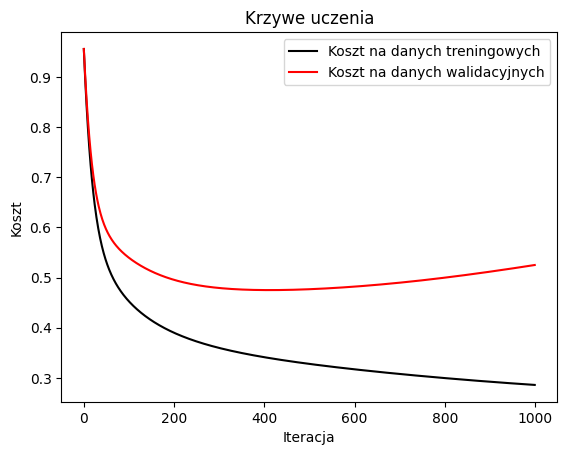

In [15]:
# -------------------- Trening sieci neuronowej -------------------------
# Dokonaj treningu sieci neuronowej
Theta = train_raw_nn(
    Xtrain=Xtrain_norm, 
    ytrain=ytrain_ohe, 
    Xval=Xval_norm, 
    yval=yval_ohe, 
    num_classes=num_classes)

# ----------------- Predykcja i sprawdzenie działania -------------------
pred, _, _ = pred_raw_nn(Xtrain_norm, Theta)
accuracy = np.mean(pred==ytrain)
print("Dokładność modelu na danych treningowych: "+str(accuracy*100)+'%')
pred, _, _ = pred_raw_nn(Xval_norm, Theta)
accuracy = np.mean(pred==yval)
print("Dokładność modelu na danych walidacyjnych: "+str(accuracy*100)+'%')
pred, _, _ = pred_raw_nn(Xtest_norm, Theta)
accuracy = np.mean(pred==ytest)
print("Dokładność modelu na danych testowych: "+str(accuracy*100)+'%')

Oczywiście, jeśli wyniki Cię nie satysfakcjonują, spróbuj ręcznie pozmieniać niektóre parametry sieci.


## 5. Pytania kontrolne
1. Jaka jest rola funkcji aktywacji na każdej warstwie sieci neuronowej?
2. Opisz krótko, na czym polega propagacja wsteczna (w odniesieniu do treningu sieci neuronowej).
3. Czym jest przeuczenie modelu? Wymień znane Ci techniki, które mu przeciwdziałają.

1. **Funkcja aktywacji** decyduje, czy neuron "aktywuje się" na skutek otrzymanych danych x i wagi w (czy neuron zwróci wysoką wartość albo nie). Funkcje aktywacji wprowadzają nieliniowość do modelu, co pozwala na naukę bardziej skomplikowanych funkcji.
2. **Propagacja wsteczna** to proces, który umożliwia trenowanie sieci neuronowych. Polega na przekazywaniu od warstwy wyjściowej do wejściowej informacji, jak zmiana pewnego parametru wpływa na zmianę kosztu liczonego na wyjściu sieci, aby ostatecznie wybrać optymalne wartości parametrów.
    **Proces:**
   * inicjalizacja wag (losowo)
   * obliczenie odpowiedzi wszystkich neuronów dla każdej warstwy oraz wartości funkcji kosztu
   * powtarzaj dopóki nie wytrenujemy model:
      * oblicz gradienty, w jakim kierunku aktualizować wagi, aby błąd był jak najmniejszy, przekazując informację o błędzie popełnianym przez wyższą warstwę
      * dokonaj aktualizacji wag
3. **Przeuczenie** (overfitting) to sytuacja kiedy nasz model świetnie sobie radzi z danymi treningowymi, ale słabo z nowymi danymi.
    **Techniki zapobiegania:**
   * **regularyzacja** - polega na "karaniu" modelu, gdy model próbuje się nauczyć zbyt skomplikowanych zależności. Jest to dodanie do funkcji kosztu składnika ||theta||2, który zależy od wartości wyuczonych parametrów (jeśli parametry osiągają coraz większe wartości to funkcja kosztu i regularyzacja rośnie).
   * **dropout** - z pewnym prawd. usuwamy neuron, jednocześnie zmniejszając jej złożoność i zmuszamy inne neurony do lepszej generalizacji.
   * **odpowiedni dobór hiperparametrów** - wartości od których zależy działanie modelu, np.: ilość neuronów w warstwie, ilość warstw, stała uczenia (aktualizacja wag), stała regularyzacji (wpływ na funkcję kosztu)